# Heart Attack Analysis & Prediction

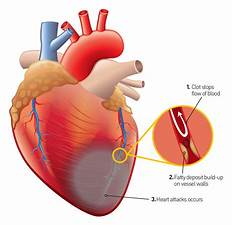

## AIM:- The Purpose of this Project is to create a Machine learning model to predict a person's chance of a heart attack.

# Column details
####    Categorical
    sex - Gender of person
    cp - Chest pain type
    caa - number of major vessels (0-3)

    fbs - fasting blood sugar (fbs > 120 mg/dl) (1 = true, 0 = false)

    restecg - resting electrocardiographic results

    (0:normal, 1:ST-T wave abnormality, 2:showing probable or definite left ventricular hypertrophy by Estes' criteria)

    exng - exercise induced angina (1= yes, 0 = no)

    slp - slope
    thall - thal rate
####    Continuous
    trtbps - Resting blood pressure (mm Hg)
    chol - cholesterol in mg/dl fetched via BMI sensor (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)

    Age - Age of person

    thalachh - maximum heart rate achieved
    oldpeak - previous peak

In [83]:
# First Of all Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import sklearn

#### Dataset Link;-https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [13]:
heart_df = pd.read_csv('heart.csv')
header = ['Saturation Level']

In [14]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Shape of dataset

In [15]:
heart_df.shape

(303, 14)

### Missing Values

In [16]:
heart_df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

##### You Can See that there is nothing any missing records or values in dataset

In [17]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Statistical Summary 

In [18]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Target
###    output - target variable (0 = less chance of heart attack, 1 = more chance of heart attack)

In [30]:
heart_df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

C:\pythonnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


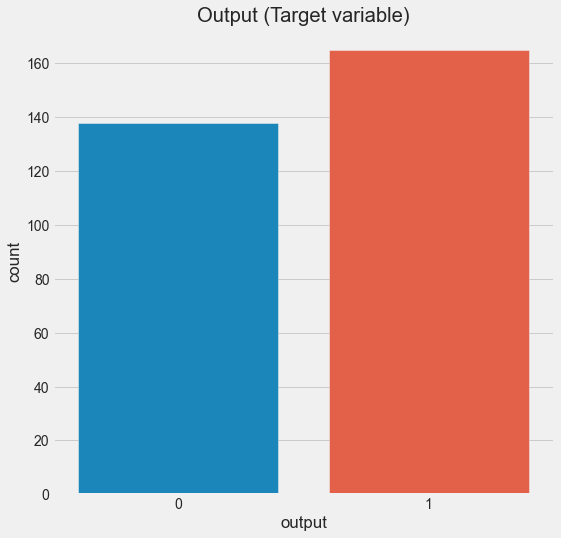

In [40]:
plt.figure(figsize = (8,8))
plt.style.use("fivethirtyeight")
plt.title("Output (Target variable)")
sns.countplot(heart_df["output"])
plt.show()

##### Conclusion:
      Values are as following: (0 contains: 138) (1 contains:165) in the case of output 0 means a lower chance of heart        attack whereas 1 means a higher chance of heart attack (54.45% of patients have a higher chance of heart attack).

# Sex

In [45]:
heart_df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

C:\pythonnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


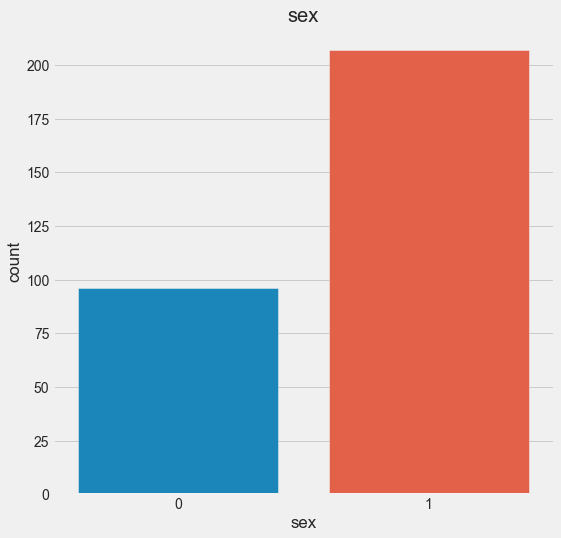

In [46]:
plt.figure(figsize=(8,8))
plt.title('sex')
sns.countplot(heart_df['sex'])
plt.show()

##### Conclusion:
             Looking at the difference in gender, a total of (68% are 1) whereas (31% is 0)

# Age

C:\pythonnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


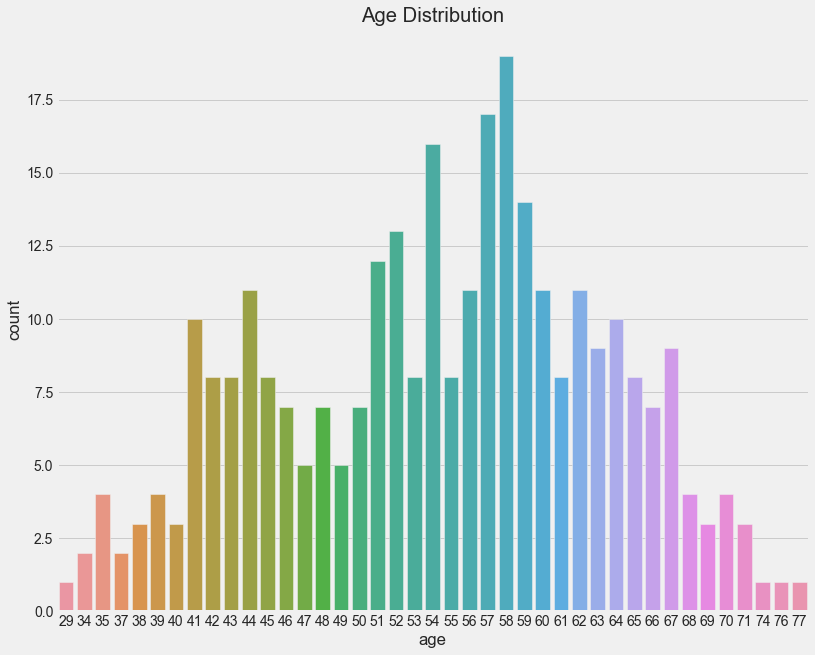

In [53]:
plt.figure(figsize=(12,10))
plt.title('Age Distribution')
sns.countplot(heart_df['age'])
plt.show()

##### Conclusion:
      The biggest age group is 58 years old, followed by 57 and 54.

# Correlation

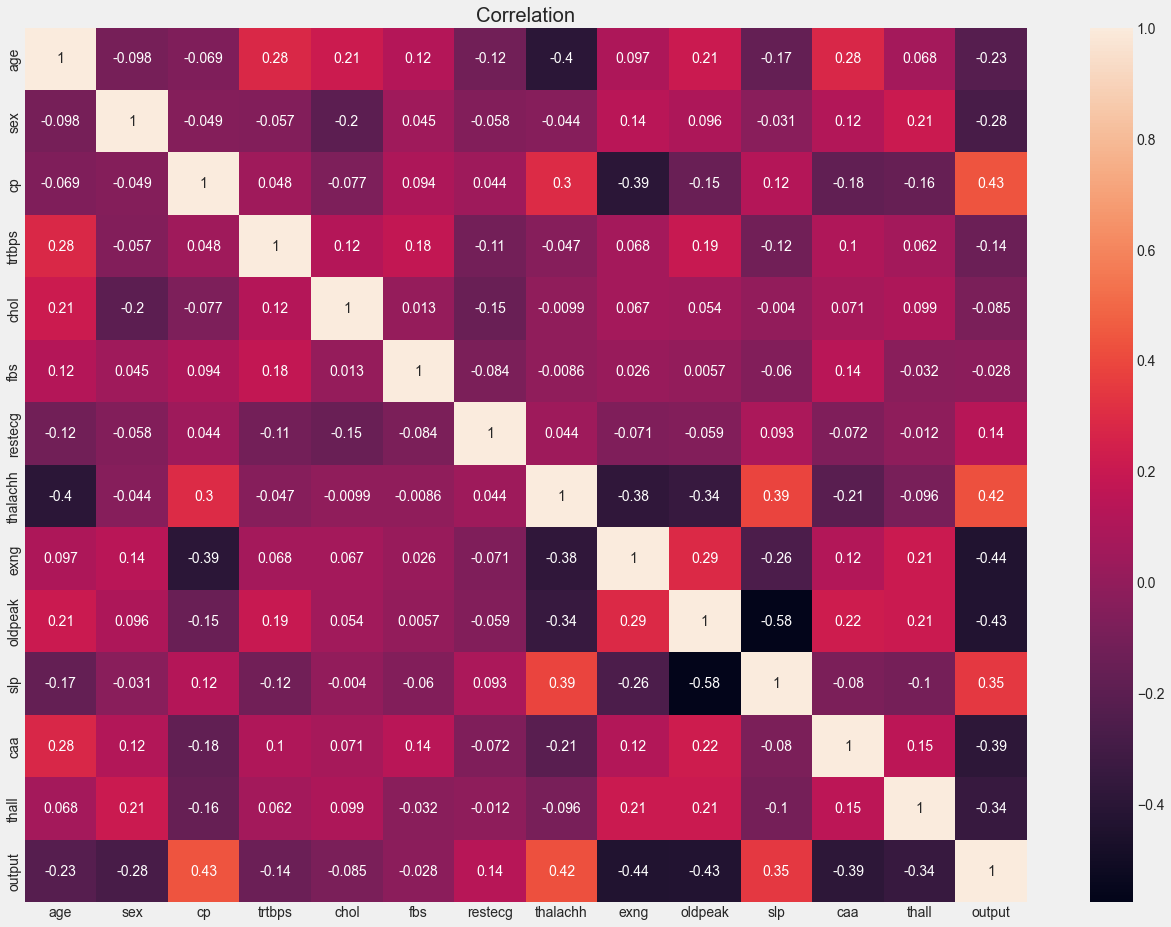

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [58]:
plt.figure(figsize=(20,15))
plt.title('Correlation')
sns.heatmap(heart_df.corr(),annot=True)
plt.show()
heart_df.corr()

# Chest Pain Vs. Output

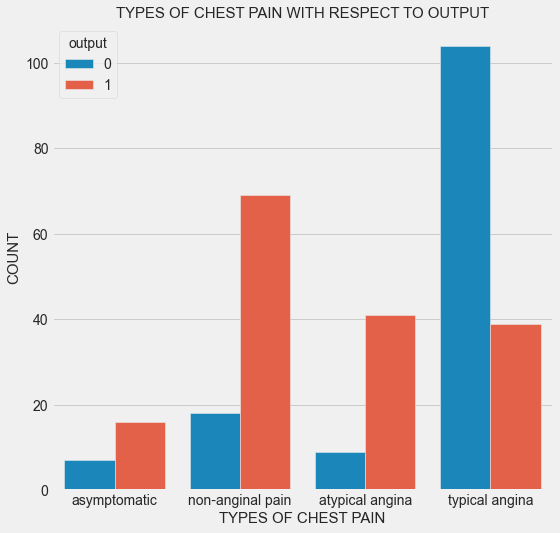

In [82]:
plt.figure(figsize=(8,8))
chest_pain=heart_df.cp.map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
sns.countplot(x=chest_pain,hue='output',data=heart_df)
plt.xlabel('TYPES OF CHEST PAIN',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.title('TYPES OF CHEST PAIN WITH RESPECT TO OUTPUT',fontsize=15)
plt.show()

# Sex vs. Output

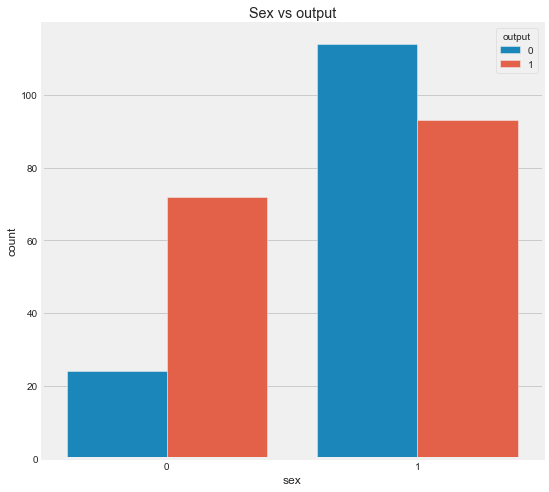

In [93]:
plt.figure(figsize = (8,8))
sns.countplot(x=heart_df['sex'], hue=heart_df['output'])
plt.title("Sex vs output")
plt.show()

# Age vs. chance of heart attack

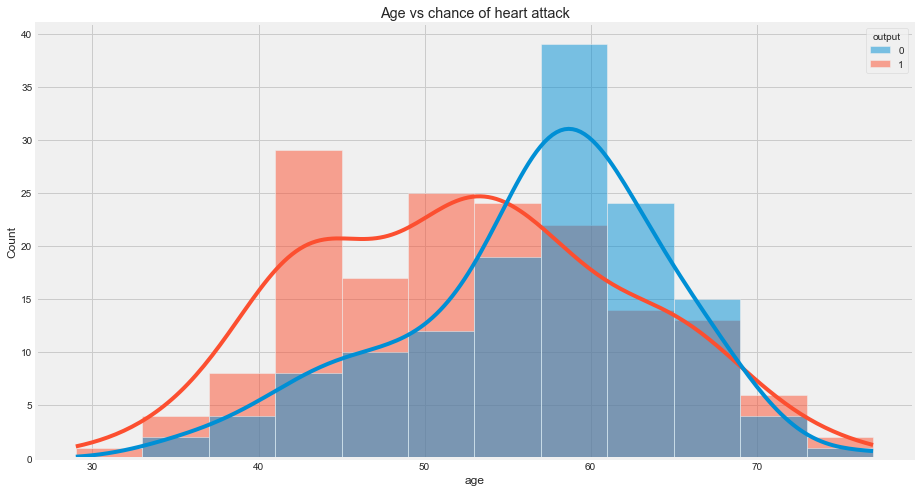

In [91]:
plt.figure(figsize = (14,8))
sns.histplot(x=heart_df['age'],hue=heart_df['output'],kde=True)
plt.title("Age vs chance of heart attack")
plt.show()

##### Conclusion:
    Heart attacks are more likely between the age of 40 and 55. (output 0 = lower chance, 1 = higher chance)

# Age vs. trtbps

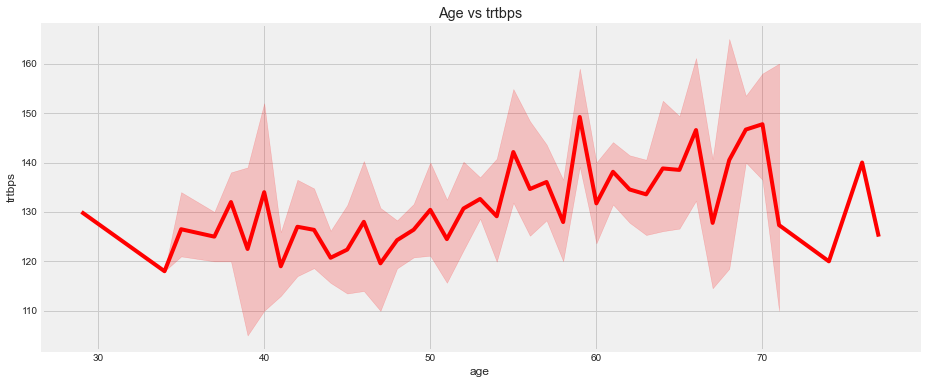

In [98]:
plt.figure(figsize=(14,6))
plt.style.use
sns.lineplot(x=heart_df['age'],y=heart_df['trtbps'], color='red')
plt.title("Age vs trtbps")
plt.show()

###### Conclusion:
           Theres an increase in resting blood pressure the older you get.

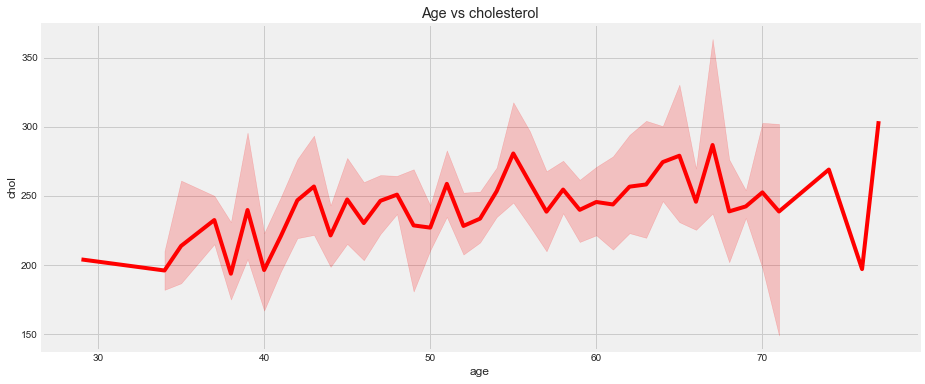

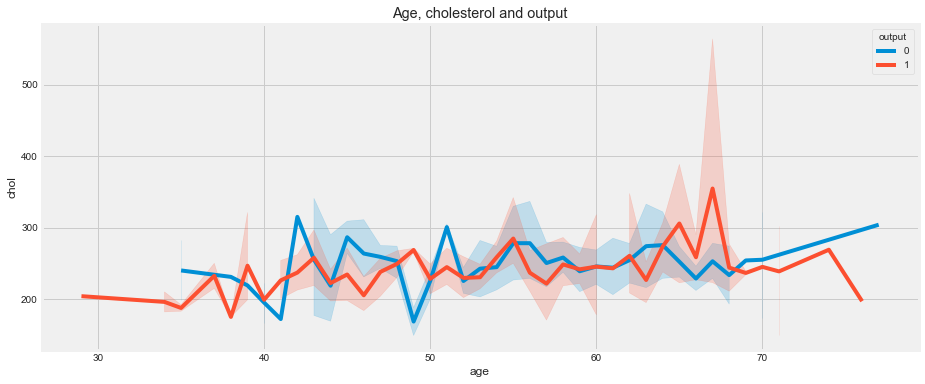

In [101]:
plt.figure(figsize=(14,6))
sns.lineplot(x=heart_df['age'],y=heart_df['chol'], color='red')
plt.title("Age vs cholesterol")
plt.figure(figsize=(14,6))
sns.lineplot(x=heart_df['age'],y=heart_df['chol'], hue=heart_df['output'])
plt.title("Age, cholesterol and output")
plt.show()

##### Conclusion:
     Theres an increase in cholesterol the older you get but there doesn't seem to be a relation in a higher chance of heart attack with an increase in cholesterol and age

## Spliting the dataset

In [102]:
# Independent
X=heart_df.drop(['output'],axis=1)

In [118]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [111]:
# Dependent
y=heart_df.iloc[:,-1]

In [117]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

##  Feature Scaling

In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression(random_state=42)
classifier1.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [132]:
y_pred=classifier1.predict(X_test)

In [133]:
classifier1.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [137]:
from sklearn.metrics import accuracy_score

In [143]:
acc_score=accuracy_score(y_test, y_pred)
print('accuracy score of LogisticRegression is',acc_score)

accuracy score of LogisticRegression is 0.8131868131868132


## KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier
classifier2=KNeighborsClassifier(n_neighbors= 5, p = 2)
classifier2.fit(X_train,y_train)

KNeighborsClassifier()

In [140]:
y_predict=classifier2.predict(X_test)

In [141]:
classifier2.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [144]:
acc_score=accuracy_score(y_test,y_predict)
print('accuracy Score of KNN is',acc_score)

accuracy Score of KNN is 0.8681318681318682


## Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
classifier3=RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier3.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [147]:
y_predict=classifier3.predict(X_test)

In [148]:
classifier3.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [149]:
acc_score=accuracy_score(y_test,y_predict)
print('accuracy of RandomForest is',acc_score)

accuracy of RandomForest is 0.8351648351648352


# Final
 ###     KNN looks the most promising with 86% accuracy